Dzień dobry witam wszystkich

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
import scipy.stats as stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_parquet('/content/preprocessed_final.parquet')

In [4]:
df_0 = df[df['tsne_label'] == 0]
y = df_0['label']
X = df_0.drop(columns=['label', 'tsne_label'])

In [5]:
svc = SVC(C= 100, kernel='rbf')
rf = RandomForestClassifier(max_depth= 30, min_samples_split= 2, n_estimators= 500)
nb = GaussianNB(priors= None, var_smoothing= 0.001)

In [6]:
def CrossValidate(model, X, y, n_splits=5):
  scoring = {
        'f1' : make_scorer(f1_score),
        'accuracy' : make_scorer(accuracy_score),
        'precision_score' : make_scorer(precision_score),
        'recall_score' : make_scorer(recall_score)
  }
  scores = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True, n_jobs=-1)
  return scores

In [7]:
rf_scores = CrossValidate(rf,X,y)
svc_scores = CrossValidate(svc,X,y)
nb_scores = CrossValidate(nb,X,y)


In [8]:
svc_scores

{'fit_time': array([63.8863616 , 67.35545874, 69.65980005, 68.09790277, 41.34345055]),
 'score_time': array([9.99391961, 9.50025082, 5.49064469, 5.61592317, 4.23320532]),
 'test_f1': array([0.95012048, 0.95289594, 0.95020546, 0.95046886, 0.94688667]),
 'train_f1': array([0.95807734, 0.95706926, 0.9576981 , 0.95761997, 0.95799332]),
 'test_accuracy': array([0.94974508, 0.95241563, 0.94998786, 0.94998179, 0.94646109]),
 'train_accuracy': array([0.95775417, 0.95675266, 0.95738998, 0.95733058, 0.95766441]),
 'test_precision_score': array([0.94307582, 0.94337378, 0.94608905, 0.94119048, 0.93953155]),
 'train_precision_score': array([0.95080399, 0.95011365, 0.95082261, 0.9511976 , 0.95057966]),
 'test_recall_score': array([0.95727118, 0.96261228, 0.95435785, 0.95993201, 0.95435785]),
 'train_recall_score': array([0.96546282, 0.96412747, 0.96467375, 0.96412964, 0.96552352])}

In [9]:
nb_scores

{'fit_time': array([0.07932138, 0.04418182, 0.0421896 , 0.04820085, 0.01913118]),
 'score_time': array([0.07718229, 0.031461  , 0.05100107, 0.06857634, 0.02104163]),
 'test_f1': array([0.83863198, 0.83450494, 0.83728773, 0.84399952, 0.84367598]),
 'train_f1': array([0.83866149, 0.84047997, 0.84064982, 0.83950176, 0.84006578]),
 'test_accuracy': array([0.83733916, 0.83139111, 0.83600388, 0.84108292, 0.83974748]),
 'train_accuracy': array([0.83611533, 0.83820941, 0.83805766, 0.83654517, 0.83766805]),
 'test_precision_score': array([0.83201912, 0.81937295, 0.83078394, 0.82869179, 0.82358382]),
 'train_precision_score': array([0.82583113, 0.82884797, 0.8274058 , 0.8246107 , 0.82781379]),
 'test_recall_score': array([0.84535081, 0.85020636, 0.84389415, 0.85988344, 0.864773  ]),
 'train_recall_score': array([0.85189681, 0.8524431 , 0.85432473, 0.85494052, 0.85268589])}

In [10]:
rf_scores

{'fit_time': array([121.45574903, 121.20438457, 109.16177559, 108.09603024,
         68.6454196 ]),
 'score_time': array([1.80248904, 1.32642078, 1.13458276, 1.06794167, 0.82585645]),
 'test_f1': array([0.95507246, 0.96078431, 0.95134086, 0.95511282, 0.95585042]),
 'train_f1': array([0.99978755, 0.99963581, 0.99972687, 0.99966617, 0.99978755]),
 'test_accuracy': array([0.95484341, 0.96067007, 0.95132314, 0.95459512, 0.95556635]),
 'train_accuracy': array([0.99978756, 0.99963581, 0.99972686, 0.99966617, 0.99978756]),
 'test_precision_score': array([0.95025234, 0.95800145, 0.95099466, 0.94423351, 0.94989211]),
 'train_precision_score': array([0.99981789, 0.99963581, 0.99969653, 0.99969651, 0.99981789]),
 'test_recall_score': array([0.95994173, 0.96358339, 0.9516873 , 0.96624575, 0.96188395]),
 'train_recall_score': array([0.99975721, 0.99963581, 0.99975721, 0.99963583, 0.99975721])}

In [11]:
def calculate_statistics(metrics, selected_metrics):

    # Create a DataFrame from the selected metrics
    df_selected = pd.DataFrame({key: metrics[key] for key in selected_metrics})

    # Calculate mean and standard deviation for each selected metric
    stats_selected = df_selected.describe().loc[['mean', 'std']]

    # Calculate additional statistics
    #stats_selected.loc['variance'] = df_selected.var()
    #stats_selected.loc['min'] = df_selected.min()
    #stats_selected.loc['max'] = df_selected.max()
    #stats_selected.loc['range'] = df_selected.max() - df_selected.min()
    stats_selected.loc['median'] = df_selected.median()
    #stats_selected.loc['25%'] = df_selected.quantile(0.25)
    #stats_selected.loc['75%'] = df_selected.quantile(0.75)
    #stats_selected.loc['IQR'] = stats_selected.loc['75%'] - stats_selected.loc['25%']

    return stats_selected

In [12]:
svc_states = calculate_statistics(svc_scores, ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score'])
nb_states = calculate_statistics(nb_scores, ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score'])
rf_states = calculate_statistics(rf_scores, ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score'])

In [14]:
print(svc_states)

         test_f1  test_accuracy  test_precision_score  test_recall_score
mean    0.950115       0.949718              0.942652           0.957706
std     0.002138       0.002123              0.002469           0.003593
median  0.950205       0.949982              0.943076           0.957271


In [ ]:
rf_states.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n & test_f1 & test_accuracy & test_precision_score & test_recall_score \\\\\n\\midrule\nmean & 0.955705 & 0.955448 & 0.950156 & 0.961348 \\\\\nstd & 0.003354 & 0.003297 & 0.004172 & 0.006255 \\\\\nmedian & 0.955419 & 0.955208 & 0.950938 & 0.963098 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
nb_states.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n & test_f1 & test_accuracy & test_precision_score & test_recall_score \\\\\n\\midrule\nmean & 0.839620 & 0.837113 & 0.826890 & 0.852822 \\\\\nstd & 0.004129 & 0.003766 & 0.005295 & 0.009152 \\\\\nmedian & 0.838632 & 0.837339 & 0.828692 & 0.850206 \\\\\n\\bottomrule\n\\end{tabular}\n'

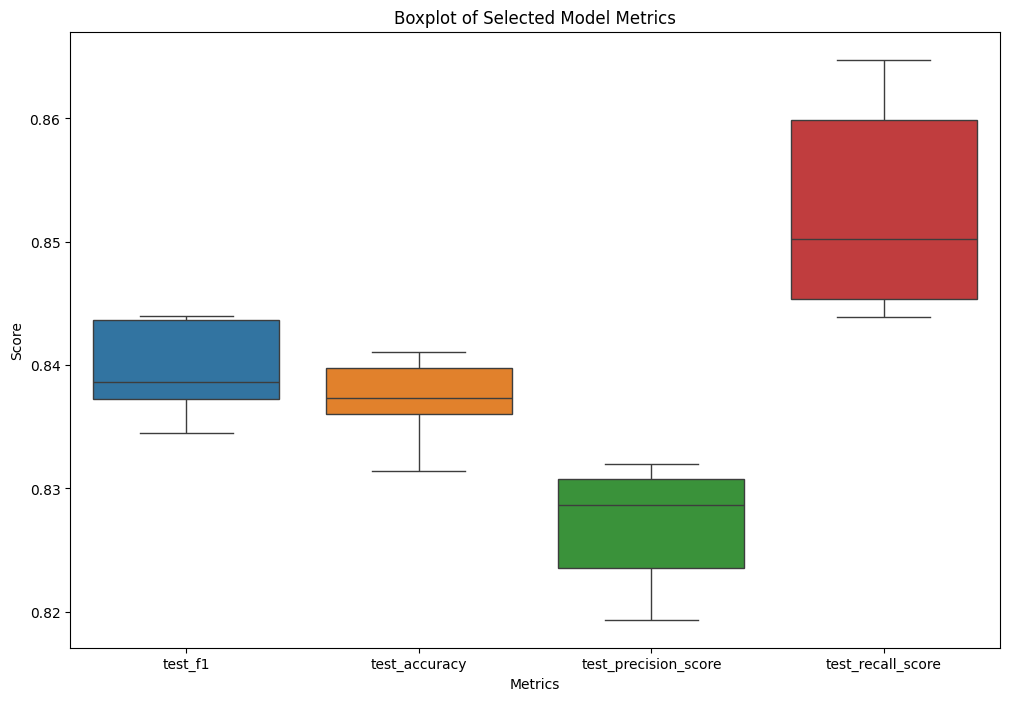

In [15]:
selected_metrics = ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score']

# Create a DataFrame from the selected metrics
df_selected = pd.DataFrame({key: nb_scores[key] for key in selected_metrics})

# Create boxplots for the selected metrics
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected)
plt.title('Boxplot of Selected Model Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

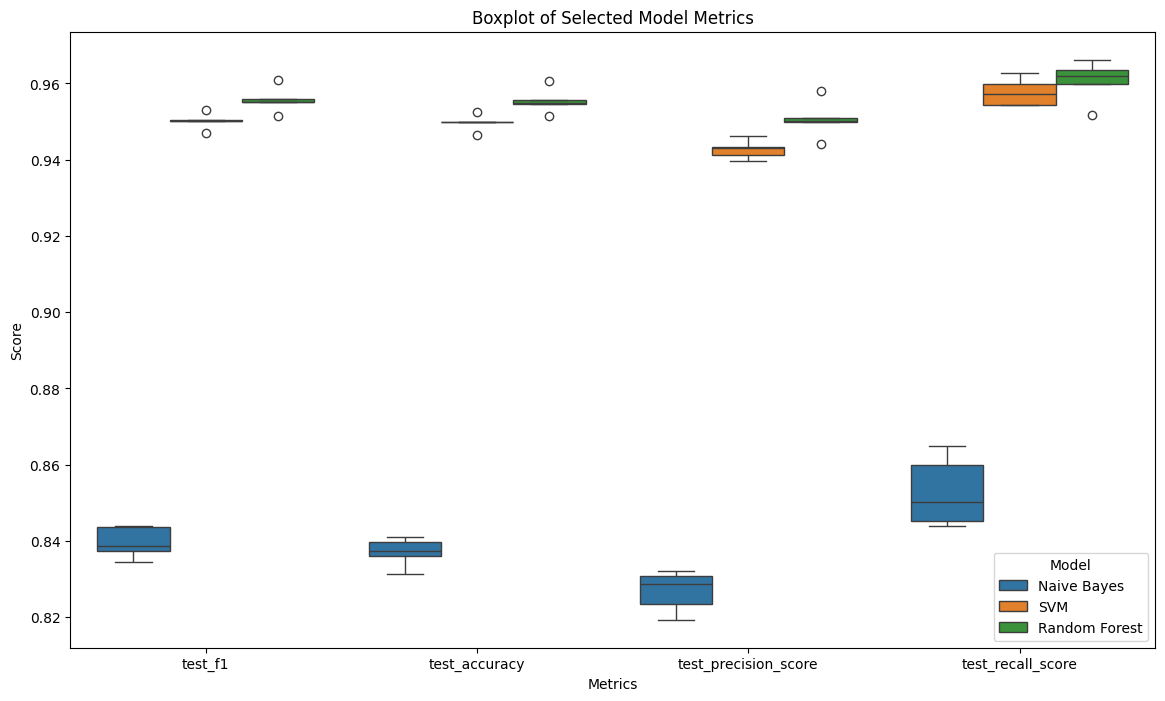

In [16]:
selected_metrics = ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score']

# Create DataFrame for each model with a column for the model name
df_nb = pd.DataFrame(nb_scores, columns=selected_metrics)
df_nb['model'] = 'Naive Bayes'

df_svc = pd.DataFrame(svc_scores, columns=selected_metrics)
df_svc['model'] = 'SVM'

df_rf = pd.DataFrame(rf_scores, columns=selected_metrics)
df_rf['model'] = 'Random Forest'

# Concatenate all DataFrames
df_combined = pd.concat([df_nb, df_svc, df_rf], axis=0, ignore_index=True)

# Melt the DataFrame to have one metric per row
df_melted = df_combined.melt(id_vars='model', var_name='metric', value_name='score')

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='metric', y='score', hue='model', data=df_melted)
plt.title('Boxplot of Selected Model Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Model')
plt.show()

In [ ]:
selected_metrics = ['test_f1', 'test_accuracy', 'test_precision_score', 'test_recall_score']

# Create a DataFrame from the selected metrics
df_selected = pd.DataFrame({key: metrics[key] for key in selected_metrics})

# Create boxplots for the selected metrics
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected)
plt.title('Boxplot of Selected Model Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

In [17]:
def ttest(rf_scores, svc_scores, nb_scores):
  keys = ['test_f1', 'test_accuracy','test_precision_score', 'test_recall_score' ]
  results = { }
  for metric in keys:
    t_stat_rf_svc, p_value_rf_svc = stats.ttest_rel(rf_scores[metric], svc_scores[metric])
    t_stat_rf_nb, p_value_rf_nb = stats.ttest_rel(rf_scores[metric], nb_scores[metric])
    t_stat_svc_nb, p_value_svc_nb = stats.ttest_rel(nb_scores[metric], svc_scores[metric])
    results[metric] = {'rf_svc':p_value_rf_svc, 'rf_nb':p_value_rf_nb,'svc_nb': p_value_svc_nb}
  return results





In [18]:
results = ttest(rf_scores, svc_scores, nb_scores)

In [19]:
results

{'test_f1': {'rf_svc': 0.015947787309848048,
  'rf_nb': 1.8112142711243981e-06,
  'svc_nb': 1.9221565294928183e-06},
 'test_accuracy': {'rf_svc': 0.015054610052958876,
  'rf_nb': 1.9329769675523493e-06,
  'svc_nb': 1.36773695608967e-06},
 'test_precision_score': {'rf_svc': 0.01743473978897492,
  'rf_nb': 7.256075574901316e-06,
  'svc_nb': 8.484254316710107e-07},
 'test_recall_score': {'rf_svc': 0.18303507889875378,
  'rf_nb': 4.130097706166817e-06,
  'svc_nb': 1.907794654427037e-05}}

In [21]:
df_results = pd.DataFrame(results)
df_results

,test_f1,test_accuracy,test_precision_score,test_recall_score
rf_svc,0.0159477873,0.0150546101,0.0174347398,0.1830350789
rf_nb,0.0000018112,0.0000019330,0.0000072561,0.0000041301
svc_nb,0.0000019222,0.0000013677,0.0000008484,0.0000190779


In [22]:
pd.set_option('display.float_format', '{:.10f}'.format)

print(df_results)

            test_f1  test_accuracy  test_precision_score  test_recall_score
rf_svc 0.0159477873   0.0150546101          0.0174347398       0.1830350789
rf_nb  0.0000018112   0.0000019330          0.0000072561       0.0000041301
svc_nb 0.0000019222   0.0000013677          0.0000008484       0.0000190779


In [23]:
df_results.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n & test_f1 & test_accuracy & test_precision_score & test_recall_score \\\\\n\\midrule\nrf_svc & 0.015948 & 0.015055 & 0.017435 & 0.183035 \\\\\nrf_nb & 0.000002 & 0.000002 & 0.000007 & 0.000004 \\\\\nsvc_nb & 0.000002 & 0.000001 & 0.000001 & 0.000019 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [31]:

def convert_to_dataframe(data, p_value= 0.05):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)
    df = df.applymap(lambda x: x < p_value/3)
    return df

In [32]:
wyniki = convert_to_dataframe(results)

In [26]:
def create_dataframe(data, keys):

    filtered_data = {key: data[key] for key in keys}
    df = pd.DataFrame(filtered_data)
    df.index.name = 'Fold'

    return df

In [27]:
keys = ['test_f1', 'test_accuracy','test_precision_score', 'test_recall_score' ]
nice = create_dataframe(rf_scores, keys)

In [28]:
nice

,test_f1,test_accuracy,test_precision_score,test_recall_score
Fold,,,,
0,0.9550724638,0.9548434086,0.9502523432,0.9599417334
1,0.9607843137,0.9606700655,0.9580014482,0.9635833940
2,0.9513408567,0.9513231367,0.9509946628,0.9516873027
3,0.9551128181,0.9545951196,0.9442335074,0.9662457504
4,0.9558504222,0.9555663470,0.9498921122,0.9618839524


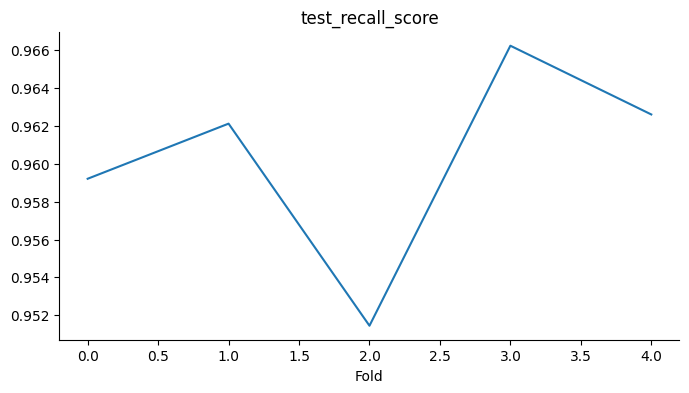

In [ ]:
# @title test_recall_score

from matplotlib import pyplot as plt
nice['test_recall_score'].plot(kind='line', figsize=(8, 4), title='test_recall_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
print(wyniki)

        test_f1  test_accuracy  test_precision_score  test_recall_score
rf_svc     True           True                 False              False
rf_nb      True           True                  True               True
svc_nb     True           True                  True               True


In [40]:
index = ['rf_svc', 'rf_nb', 'svc_nb']
df = pd.DataFrame(wyniki, index=index)

In [52]:
df_test_f1 = pd.DataFrame(df['test_f1'])
df_test_accuracy = pd.DataFrame(df['test_accuracy'])
df_test_precision_score = pd.DataFrame(df['test_precision_score'])
df_test_recall_score = pd.DataFrame(df['test_recall_score'])
df_test_recall_score.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n & test_recall_score \\\\\n\\midrule\nrf_svc & False \\\\\nrf_nb & True \\\\\nsvc_nb & True \\\\\n\\bottomrule\n\\end{tabular}\n'

In [37]:
model_scores = [svc_scores, rf_scores, nb_scores]
num_comparisons = len(model_scores) * (len(model_scores) - 1) // 2
num_comparisons


3